In [1]:

%load_ext autoreload
%autoreload 2
import random
import numpy as np
import itertools
from tqdm.notebook import tqdm

In [5]:
# filedata = {'MLPCrossEntropyModel': data}
import pickle

with open('data.pkl', 'rb') as file:
    filedata = pickle.load(file)
with open('data.pkl', 'wb') as file:
    pickle.dump(filedata, file)
# filedata

In [6]:
indices_used = list(itertools.product(itertools.permutations(range(4), 2), itertools.permutations(range(3), 2), itertools.permutations(range(2), 2)))
operations_used = list(itertools.product(range(4), repeat=3)) # 4 operations, using 3 at a time
operations = [
    lambda x, y: x + y,
    lambda x, y: x - y,
    lambda x, y: x * y,
    lambda x, y: x / y,
]
operation_names = ["+", "-", "*", "/"]
combos = list(itertools.product(indices_used, operations_used))
print("Possible ways to use the 4 numbers, possible operations to use, all combinations")
len(indices_used), len(operations_used), len(indices_used) * len(operations_used)

Possible ways to use the 4 numbers, possible operations to use, all combinations


(144, 64, 9216)

In [7]:
min_val = 1
max_val = 12
target = 24
filename = f"questions{max_val}_{target}.txt"
create_data = False
def get_questions():
    count = 0
    res = []
    for a in tqdm(range(min_val, max_val + 1)):
        count_i = 0
        for b in range(a, max_val + 1):
            for c in range(b, max_val + 1):
                for d in range(c, max_val + 1):
                    count_i += 1
                    count += 1
                    for index_order, operation_order in itertools.product(indices_used, operations_used):
                        numbers = [a, b, c, d]
                        valid = True
                        for (index1, index2), operation_index in zip(index_order, operation_order):
                            val1 = numbers[index1]
                            val2 = numbers[index2]
                            numbers.pop(max(index1, index2))
                            numbers.pop(min(index1, index2))
                            if operation_index == 3 and val2 == 0:
                                valid = False
                                break
                            result = operations[operation_index](val1, val2)
                            if result % 1 != 0 or result < 0:
                                valid = False
                                break
                            numbers.append(result)
                        if valid and numbers[0] % 1 == 0 and numbers[0] == 24:
                            res.append((a, b, c, d, 24))
                            break
        print(count_i)
    print(count)
    return res
if create_data:
    questions = get_questions()
    with open(filename, "w") as file:
        file.write("\n".join([f"{' '.join([str(item) for item in items])}" for items in questions]))
else:
    with open(filename, "r") as file:
        questions = file.read().split("\n")
        questions = [list(map(int, question.split())) for question in questions]
print(len(questions), "questions")
print(questions)

1054 questions
[[1, 1, 1, 8, 24], [1, 1, 1, 11, 24], [1, 1, 1, 12, 24], [1, 1, 2, 6, 24], [1, 1, 2, 7, 24], [1, 1, 2, 8, 24], [1, 1, 2, 9, 24], [1, 1, 2, 10, 24], [1, 1, 2, 11, 24], [1, 1, 2, 12, 24], [1, 1, 3, 4, 24], [1, 1, 3, 5, 24], [1, 1, 3, 6, 24], [1, 1, 3, 7, 24], [1, 1, 3, 8, 24], [1, 1, 3, 9, 24], [1, 1, 3, 10, 24], [1, 1, 3, 11, 24], [1, 1, 3, 12, 24], [1, 1, 4, 4, 24], [1, 1, 4, 5, 24], [1, 1, 4, 6, 24], [1, 1, 4, 7, 24], [1, 1, 4, 8, 24], [1, 1, 4, 9, 24], [1, 1, 4, 10, 24], [1, 1, 4, 12, 24], [1, 1, 5, 5, 24], [1, 1, 5, 6, 24], [1, 1, 5, 7, 24], [1, 1, 5, 8, 24], [1, 1, 6, 6, 24], [1, 1, 6, 8, 24], [1, 1, 6, 9, 24], [1, 1, 6, 12, 24], [1, 1, 7, 10, 24], [1, 1, 8, 8, 24], [1, 1, 10, 12, 24], [1, 1, 11, 11, 24], [1, 1, 11, 12, 24], [1, 1, 12, 12, 24], [1, 2, 2, 4, 24], [1, 2, 2, 5, 24], [1, 2, 2, 6, 24], [1, 2, 2, 7, 24], [1, 2, 2, 8, 24], [1, 2, 2, 9, 24], [1, 2, 2, 10, 24], [1, 2, 2, 11, 24], [1, 2, 2, 12, 24], [1, 2, 3, 3, 24], [1, 2, 3, 4, 24], [1, 2, 3, 5, 24], [1, 2, 

In [8]:
use_random = True
def solve(question):
    # pair up two numbers 1-4, then 1-3, then 1-2.
    # For each pair, we can add, subtract, multiply or divide.
    target = question[-1]
    choices = list(question[:-1]).copy()
    # shuffle it
    if use_random:
        random.shuffle(choices)
    i = 0
    while use_random or i < len(combos):
        index_order, operation_order = random.choice(combos) if use_random else combos[i]
        i += 1
        numbers = choices.copy()
        valid = True
        for (index1, index2), operation_index in zip(index_order, operation_order):
            val1 = numbers[index1]
            val2 = numbers[index2]
            numbers.pop(max(index1, index2))
            numbers.pop(min(index1, index2))
            if operation_index == 3 and val2 == 0:
                valid = False
                break
            numbers.append(operations[operation_index](val1, val2))
        if valid and numbers[0] == target:
            return True, index_order, operation_order, i
    return False, None, None, -1
def print_solution(numbers, index_order, operation_order, answer):
    terms = [str(x) for x in numbers]
    for (index1, index2), operation_index in zip(index_order, operation_order):
        term1 = terms[index1]
        term2 = terms[index2]
        terms.pop(max(index1, index2))
        terms.pop(min(index1, index2))
        new_term = f"({term1} {operation_names[operation_index]} {term2})"
        terms.append(new_term)
    print(" ".join(terms), "=", answer)
debug = False
avg_count = 0
n_entries = 0
solutions = []
min_count = 100000
max_count = 0
filedata['random'] = []
for question in tqdm(questions):
    valid, index_order, operation_order, i = solve(question)
    if not valid:
        print("Failed to solve", question)
        break
    else:
        min_count = min(min_count, i)
        max_count = max(max_count, i)
        filedata['random'].append(i)
        avg_count += i
        n_entries += 1
        solutions.append([question[:-1], question[-1], index_order, operation_order])
        if debug:
            print("input", question, "indices", index_order, "operations", operation_order, "count", i)
            print_solution(question[0], index_order, operation_order, question[1])
            print()

print("Average count", avg_count / n_entries, "Min", min_count, "Max", max_count) # 1183.991 in order, 661.90353 random

  0%|          | 0/1054 [00:00<?, ?it/s]

Average count 362.2068311195446 Min 1 Max 11902


In [9]:
label_is_3d = True
print(solutions[0])
X = np.zeros((len(solutions), 4))
y = np.zeros((len(solutions), 3, 4)) if label_is_3d else np.zeros((len(solutions), 3*4)) # predict the 3 operations using one hot encoding
def f(solution):
    return solution[0]
for i, sol in enumerate(solutions):
    X[i] = f(sol) # input
    # y[i] = sol[3] # regression output
    # one hot encoding
    for rule_index in range(3):
        if label_is_3d:
            y[i, rule_index, sol[3][rule_index]] = 1
        else:
            y[i, rule_index*4 + sol[3][rule_index]] = 1
print(X.shape, X)
print(y.shape, y)

[[1, 1, 1, 8], 24, ((0, 2), (1, 2), (1, 0)), (0, 0, 2)]
(1054, 4) [[ 1.  1.  1.  8.]
 [ 1.  1.  1. 11.]
 [ 1.  1.  1. 12.]
 ...
 [11. 11. 12. 12.]
 [11. 12. 12. 12.]
 [12. 12. 12. 12.]]
(1054, 3, 4) [[[1. 0. 0. 0.]
  [1. 0. 0. 0.]
  [0. 0. 1. 0.]]

 [[1. 0. 0. 0.]
  [1. 0. 0. 0.]
  [0. 0. 1. 0.]]

 [[1. 0. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]]

 ...

 [[0. 1. 0. 0.]
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]]

 [[0. 0. 0. 1.]
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]]

 [[1. 0. 0. 0.]
  [1. 0. 0. 0.]
  [0. 1. 0. 0.]]]


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import classification_report
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.linear_model import LogisticRegression


class RegressionIndexModel:
    def __init__(self):
        self.base_model = lambda: LogisticRegression(max_iter=1000)
    
    def fit(self, X, y):
        n = y.shape[1]
        self.models = [None] * n
        for i in range(n):
            self.models[i] = self.base_model()
            self.models[i] = self.models[i].fit(X, np.argmax(y[:, i, :], axis=1))
        
        return self
    
    def predict(self, X):
        preds = [model.predict(X) for model in self.models] # Predict each output
        return np.stack(preds, axis=1) # stack them together
    
    def predict_proba(self, X):
        probas = [model.predict_proba(X) for model in self.models]
        return np.stack(probas, axis=1)
class MLPCrossEntropyModel:
    def __init__(self, propagate=True):
        self.propagate = propagate
        self.base_model = lambda: MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000)
    def fit(self, X, y):
        self.y_shape = y.shape
        self.models = [None] * y.shape[1]
        for i in range(y.shape[1]):
            self.models[i] = self.base_model()
            if self.propagate:
                revealed_y_data = y[:, 0:i, :]
                revealed_y_data = np.reshape(revealed_y_data, (revealed_y_data.shape[0], revealed_y_data.shape[1] * revealed_y_data.shape[2]))
                modified_x = np.concatenate((X, revealed_y_data), axis=1)
                self.models[i] = self.models[i].fit(modified_x, np.argmax(y[:, i, :], axis=1))
            else:
                self.models[i] = self.models[i].fit(X, np.argmax(y[:, i, :], axis=1))
        return self
    
    def predict(self, X):
        if self.propagate:
            return self.predict_proba(X).argmax(axis=2)
        else:
            return np.swapaxes(np.array([model.predict(X) for model in self.models]), 0, 1)
    
    def predict_proba(self, X):
        if self.propagate:
            predicted_proba = np.zeros((X.shape[0], self.y_shape[1], self.y_shape[2]))
            for i in range(self.y_shape[1]):
                revealed_y_data = predicted_proba[:, 0:i, :]
                revealed_y_data = np.reshape(revealed_y_data, (revealed_y_data.shape[0], revealed_y_data.shape[1] * revealed_y_data.shape[2]))
                modified_x = np.concatenate((X, revealed_y_data), axis=1)
                out = self.models[i].predict_proba(modified_x)
                predicted_proba[:, i, :] = out
            return predicted_proba
        else:
            return np.swapaxes(np.array([model.predict_proba(X) for model in self.models]), 0, 1)
class MSEOperationPresence:
    def __init__(self):
        # self.base_model 
        pass
    def fit(self, X, y):
        self.models = [self.base_model.fit(X, np.argmax(y[:, i, :], axis=1)) for i in range(y.shape[1])]
        return self
    
    def predict(self, X):
        return np.swapaxes(np.array([model.predict(X) for model in self.models]), 0, 1)
    
    def predict_proba(self, X):
        return np.swapaxes(np.array([model.predict_proba(X) for model in self.models]), 0, 1)
modelname = 'MLPCrossEntropyModel'
# First two models have issue with all models predicting the same thing
model = {'RegressionIndexModel': RegressionIndexModel(), 'MLPCrossEntropyModel': MLPCrossEntropyModel(), 'MSEOperationPresence': MSEOperationPresence()}[modelname]
model.fit(X_train, y_train)

y_pred = model.predict_proba(X_test)
# print(y_test)
# print(y_pred)

In [24]:
y_test[0], y_pred[0]

(array([[0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.]]),
 array([[0.35693359, 0.31352944, 0.10780167, 0.22173529],
        [0.47226603, 0.41190181, 0.07407758, 0.04175457],
        [0.1040659 , 0.0506965 , 0.84023391, 0.00500368]]))

In [29]:
use_random_weights = True
debug = False
use_random_list = False
min_probability = 0.1
def solve_with_model(x):
    # pair up two numbers 1-4, then 1-3, then 1-2.
    # For each pair, we can add, subtract, multiply or divide.

    target = 24
    choices = list(x)
    # shuffle it
    if use_random_weights:
        random.shuffle(choices)

    i = 0
    y = model.predict_proba(np.reshape(x, (1, -1)))[0]
    # apply a min probability on each operation
    y = np.maximum(y, min_probability)
    y = y / np.sum(y, axis=1)[:, np.newaxis]
    if debug:
        print(x, y)
    if use_random_list:
        random_index_combinations = list(itertools.product(itertools.permutations(range(4), 2), itertools.permutations(range(3), 2), itertools.permutations(range(2), 2)))
        random.shuffle(random_index_combinations)
        # sort the operations by probability
        sorted_operation_combinations = list(itertools.product(*(y.shape[1] - 1 - np.argsort(y))))
    while True:
        if use_random_list:
            index_first = True
            index_i = i % len(random_index_combinations) if index_first else i // len(sorted_operation_combinations)
            operation_i = i // len(random_index_combinations) if index_first else i % len(sorted_operation_combinations)
        index_order = random_index_combinations[index_i] if use_random_list else random.choice(indices_used)
        operation_order = sorted_operation_combinations[operation_i] if use_random_list else [random.choices(range(4), weights=y[op_index], k=1)[0] for op_index in range(3)]
        i += 1
        numbers = choices.copy()
        valid = True
        for (index1, index2), operation_index in zip(index_order, operation_order):
            val1 = numbers[index1]
            val2 = numbers[index2]
            numbers.pop(max(index1, index2))
            numbers.pop(min(index1, index2))
            if operation_index == 3 and val2 == 0:
                valid = False
                break
            numbers.append(operations[operation_index](val1, val2))
        if valid and numbers[0] == target:
            return True, index_order, operation_order, i
    return False, None, None, -1
def print_solution(numbers, index_order, operation_order, answer):
    terms = [str(x) for x in numbers]
    for (index1, index2), operation_index in zip(index_order, operation_order):
        term1 = terms[index1]
        term2 = terms[index2]
        terms.pop(max(index1, index2))
        terms.pop(min(index1, index2))
        new_term = f"({term1} {operation_names[operation_index]} {term2})"
        terms.append(new_term)
    print(" ".join(terms), "=", answer)
data = {}
for name, X_split, y_split in [("train", X_train, y_train), ("test", X_test, y_test)]:
    # if name == "train":
    #     continue
    print(name)
    counts = []
    for i in tqdm(range(len(X_split))):
        valid, index_order, operation_order, count = solve_with_model(X_split[i])
        if not valid:
            print("Failed to solve", X_split[i])
            break
        else:
            counts.append(count)
            if debug:
                print("input", X_split[i], "indices", index_order, "operations", operation_order, "count", i)
                print_solution(X_split[i], index_order, operation_order, 24)
                print()
                if i > 10:
                    break
    data[name] = counts
    print(name, "Average count", sum(counts) / len(counts)) # Train/Test 841.2078 / 766.814

train


  0%|          | 0/843 [00:00<?, ?it/s]

train Average count 549.7722419928825
test


  0%|          | 0/211 [00:00<?, ?it/s]

test Average count 703.9383886255924


Split train had average count 2245.449118207817
Split test had average count 2276.4287756074323
Split random had average count 676.360594795539


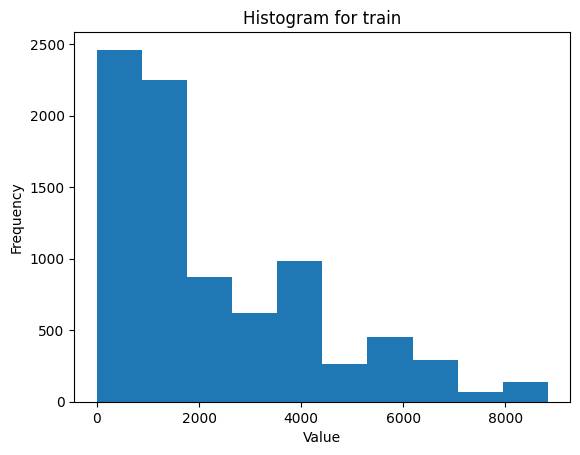

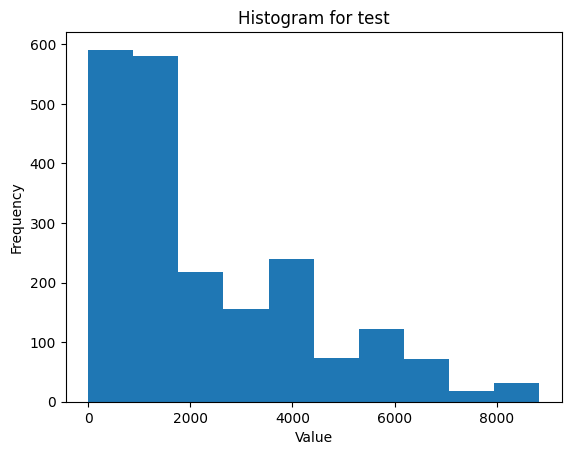

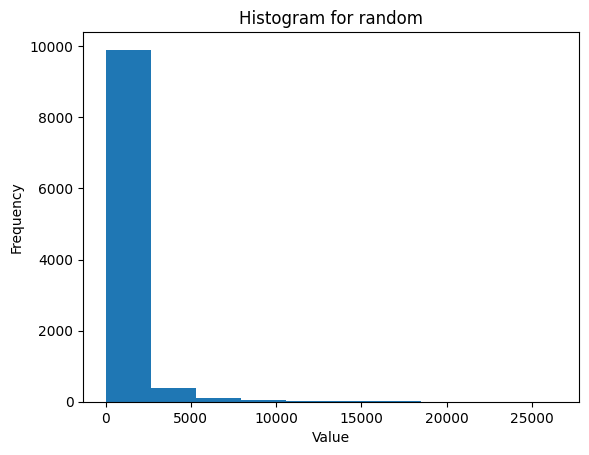

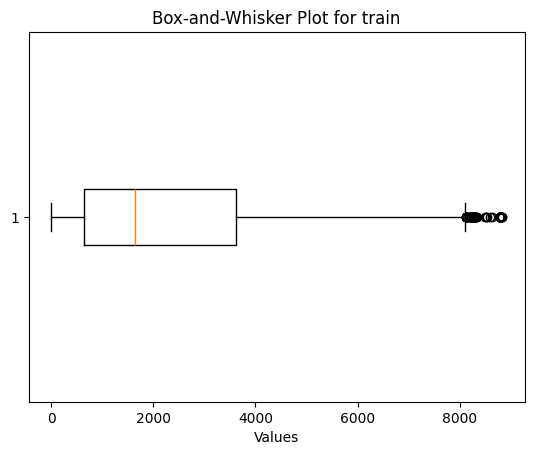

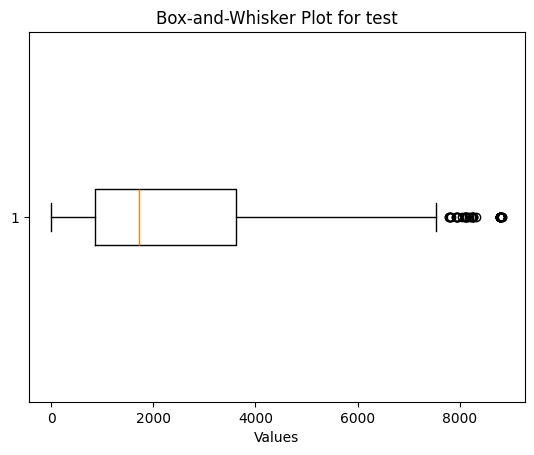

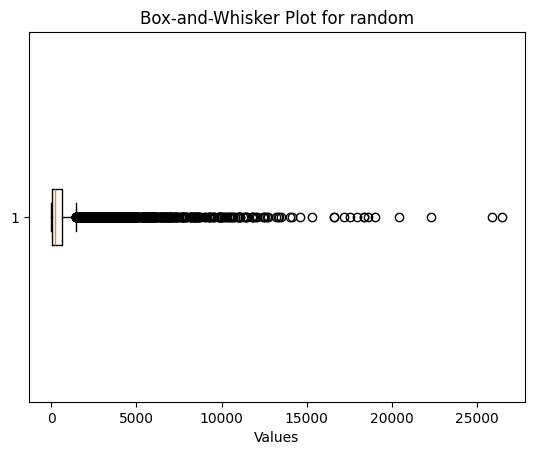

In [86]:
import matplotlib.pyplot as plt


for split in data.keys():
    print("Split", split, "had average count", sum(data[split]) / len(data[split]))
for split in data.keys():
    # Create the histogram
    plt.hist(data[split])
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Histogram for ' + split)
    plt.show()
for split in data.keys():
    # Display the histogram
    plt.boxplot(data[split],vert=False)
    plt.xlabel('Values')
    plt.title('Box-and-Whisker Plot for ' + split)
    plt.show()

In [46]:
print(name, "Average count", avg_count / n_entries) # Train/Test 841.2078 / 766.814
i=4527
print(i)
print(X_train[i])
print(model.predict_proba([X_train[i]]))
print(solutions[-5])

train Average count 4637.125248508946
4527
[23. 23. 23. 23.]
[[[5.94274986e-01 2.97923060e-01 2.87411210e-08 1.07801925e-01]
  [5.94274986e-01 2.97923060e-01 2.87411210e-08 1.07801925e-01]
  [5.94274986e-01 2.97923060e-01 2.87411210e-08 1.07801925e-01]]]
[[23, 23, 23, 23], 24, ((0, 2), (2, 0), (1, 0)), (2, 0, 3)]


In [ ]:
label_is_3d = True
print(solutions[0])
X = np.zeros((len(solutions), 5))
# 3 indices, 3 operations
y = np.zeros((len(solutions), 6, 4)) if label_is_3d else np.zeros((len(solutions), 3*4)) # predict the 3 operations using one hot encoding
for i, sol in enumerate(solutions):
    X[i] = sol[0] + [sol[1]] # input + target
    # y[i] = sol[3] # regression output
    # one hot encoding
    for rule_index in range(3):
        if label_is_3d:
            y[i, rule_index, sol[3][rule_index]] = 1
        else:
            y[i, rule_index*4 + sol[3][rule_index]] = 1
print(X.shape, X)
print(y.shape, y)